In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import math
from scipy.optimize import minimize_scalar,minimize

In [2]:
class Neohooklean:  

    def __init__(self,P,A):
        self.P = P
        self.A = A
        self.bnds2d = ((1, 10), (0.1,None))
        self.bnds3d = ((1, 10), (0.1,None),(0.1,None))

    def objective_3d(self,params):
        x,y,z=params
        return (self.A)*(x**2+y**2+z**2-3) - (self.P)*(x) # For 1-D testing

    def objective_2d(self,params):
        x,y = params
        z = 1/(x*y)
        return (self.A)*(x**2+y**2+z**2-3) - (self.P)*(x) # For 1-D testing

    def return_min(self,start_point):
        if(len(start_point)==3):
            res = minimize(self.objective_3d,x0=start_point,bounds=self.bnds3d)
            return res
        else:
            res = minimize(self.objective_2d,x0=start_point,bounds = self.bnds2d)
            return res 

    def calc_energy(self,params):
        if(len(params)==3):
            x1,x2,x3 = params
            return (self.A)*(x1**2+x2**2+x3**2-3)
        else:
            x1,x2=params
            x3 = 1/(x1*x2)
            return (self.A)*(x1**2+x2**2+x3**2-3)

In [51]:
class Plotter_Neohooklean:
    def __init__(self,index,soln,energy):
        self.index = index
        self.soln = soln
        self.energy = energy
        self.solnx = []
        self.solny = []
        for i in soln[self.index]:
            self.solnx.append(i[0])
            self.solny.append(i[1])

    def force_stretch(self):
        plt.plot(self.solnx,P,'r+')
        plt.xlabel('Stretch parameter',fontname='Times New Roman')
        plt.ylabel('Stress',fontname='Times New Roman')
        plt.title("Stress vs Stretch parameter")
        plt.show()

    def energy_stretch(self):
        lamdax = []
        lamday = []
        lamdaz = []

        for i in self.soln[self.index]:
            lamdax.append([i[0]])
            lamday.append(i[1])
            if(len(self.soln[self.index])==3):
                lamdaz.append(i[2])
            else:
                lamdaz.append(1/(i[0]*i[1]))
        plt.plot(lamdax,self.energy[self.index],'bo')
        plt.xlabel('Stretch parameter x',fontname='Times New Roman')
        plt.ylabel('Energy',fontname='Times New Roman')
        plt.title("Energy vs Stretch parameter x")
        plt.show()

        plt.plot(lamday,self.energy[self.index],'bo')
        plt.xlabel('Stretch parameter y',fontname='Times New Roman')
        plt.ylabel('Energy',fontname='Times New Roman')
        plt.title("Energy vs Stretch parameter y")
        plt.show()

        plt.plot(lamdaz,self.energy[self.index],'bo')
        plt.xlabel('Stretch parameter z',fontname='Times New Roman')
        plt.ylabel('Energy',fontname='Times New Roman')
        plt.title("Energy vs Stretch parameter z")
        plt.show()
    
    def calc_energy(self,params):
        if(len(params)==3):
            x1,x2,x3 = params
            return (A[self.index])*(x1**2+x2**2+x3**2-3) - P[448]*x1
        else:
            x1,x2=params
            x3 = 1/(x1*x2)
            return (A[self.index])*(x1**2+x2**2+x3**2-3) - P[448]*x1
    
    def check_min_lamda_2d(self):
        lamdax = np.linspace(1,10,500)
        lamday = np.ones(500)
        lamdas = []
        for i in range(500):
            lamdas.append([lamdax[i],lamday[i]])

        energy_calc = [self.calc_energy(lamdas[i]) for i in range(500)]
        plt.plot(lamdax,energy_calc)
        plt.axvline(x = self.solnx[448], color = 'purple', label = 'axvline - full height')
        plt.xlabel('Stretch parameter',fontname='Times New Roman')
        plt.ylabel('Energy',fontname='Times New Roman')
        plt.title(f'Plot Showing lamda = {np.round(self.solnx[448],2)} is minimum energy for stress = {np.round(P[448],2)}')

    def check_min_lamda_3d(self):
        lamdax = np.linspace(1,10,500)
        lamday = np.ones(500)
        lamdaz = np.ones(500)
        lamdas = []
        for i in range(500):
            lamdas.append([lamdax[i],lamday[i],lamdaz[i]])

        energy = [self.calc_energy(lamdas[i]) for i in range(500)]
        plt.plot(lamdax,energy)
        plt.axvline(x = self.solnx[448], color = 'purple', label = 'axvline - full height')
        plt.xlabel('Stretch parameter',fontname='Times New Roman')
        plt.ylabel('Energy',fontname='Times New Roman')
        plt.title(f'Plot Showing lamda = {np.round(self.solnx[448],2)} is minimum energy for stress = {np.round(P[448],2)}')

In [28]:
P = np.logspace(0,2,500)
A = np.linspace(7,10,500)

In [29]:
soln_2d = []
energy_2d = []
for k in range(500):
    temp_soln = []
    temp_energy =[]
    for i in range(len(P)):
        a = Neohooklean(P[i],A[k])
        res = a.return_min([1.,1.])
        temp_soln.append(res['x'])
        energy_node = a.calc_energy(res['x'])
        temp_energy.append(energy_node)
        
    soln_2d.append(temp_soln)
    energy_2d.append(temp_energy)

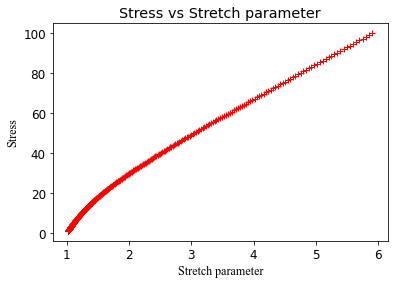

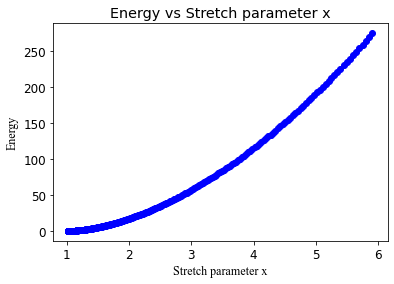

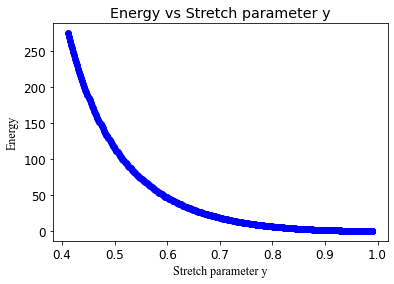

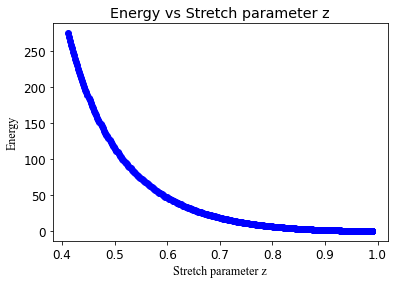

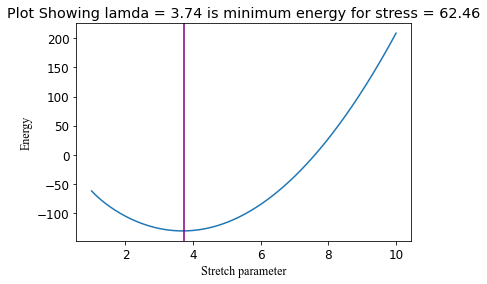

In [52]:
# Plotter takes an index for plottting
a = Plotter_Neohooklean(250,soln_2d,energy_2d)
a.force_stretch()
a.energy_stretch()
a.check_min_lamda_2d()

In [31]:
soln_3d = []
energy_3d = []
for k in range(500):
    temp_soln = []
    temp_energy =[]
    for i in range(len(P)):
        a = Neohooklean(P[i],A[k])
        res = a.return_min([1.,1.,1.])
        temp_soln.append(res['x'])
        energy_node = a.calc_energy(res['x'])
        temp_energy.append(energy_node)
    soln_3d.append(temp_soln)
    energy_3d.append(temp_energy)

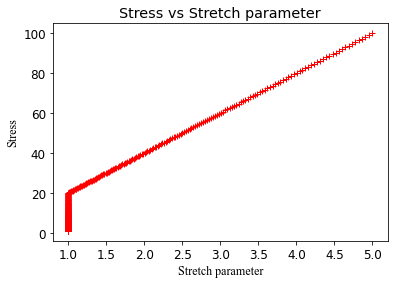

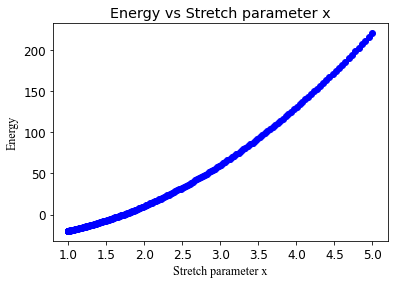

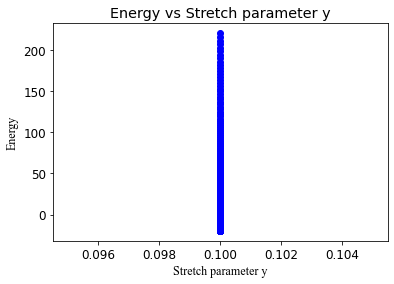

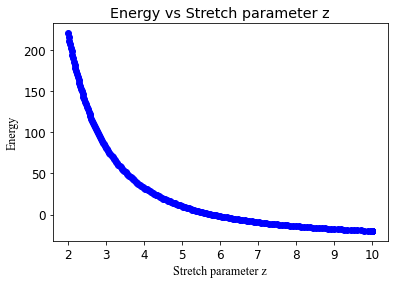

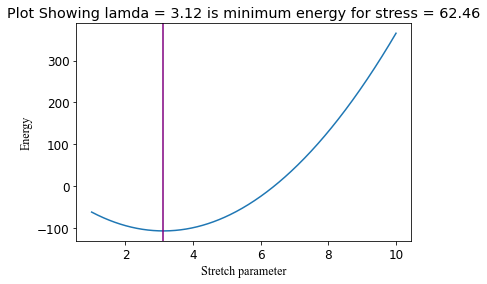

In [53]:
b = Plotter_Neohooklean(499,soln_3d,energy_3d)
b.force_stretch()
b.energy_stretch()
b.check_min_lamda_3d()

In [33]:
def calc_energy(params):
    if(len(params)==2):
        x1,x2 = params
        x3 = 1/(x1*x2)
        return (x1**2+x2**2+x3**2-3)
    else:
        x1,x2,x3 = params
        return (x1**2+x2**2+x3**2-3)

In [34]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [35]:
data = [[calc_energy(x)+np.random.normal(0,2) for x in temp] for temp in soln_2d]

In [36]:
Y = []
X = data
for i in range(500):
    Y.append(A[i])


In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

In [38]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [39]:
predictions = model.predict(X_test)
mean_squared_error(y_test, predictions)

0.012607527815550924

In [40]:
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=10)
print(scores)

[0.98026765 0.98435963 0.98481298 0.99182879 0.97633115 0.98777805
 0.98844267 0.97305668 0.96383866 0.96969087]


In [41]:
model.predict(np.array(X_test[10]).reshape(1,500))

array([7.33312625])

In [42]:
print(y_test[10])

7.264529058116232


In [43]:
data_3d =  [[calc_energy(x)+np.random.normal(0,2) for x in temp] for temp in soln_3d]

In [44]:
Y_3d = []
X_3d = data_3d
for i in range(500):
    Y_3d.append(A[i])

In [45]:
X_train_3d,X_test_3d,y_train_3d,y_test_3d = train_test_split(X_3d,Y_3d,test_size=0.25)

In [46]:
model_3d = RandomForestRegressor()
model_3d.fit(X_train_3d,y_train_3d)

RandomForestRegressor()

In [47]:
predictions_3d = model_3d.predict(X_test_3d)
mean_squared_error(y_test_3d, predictions_3d)

0.01230943958618635

In [48]:
scores = cross_val_score(model_3d, X_train_3d, y_train_3d, scoring='r2', cv=10)
print(scores)

[0.97285618 0.97514427 0.9795189  0.98733325 0.98528642 0.98024881
 0.98076493 0.98511826 0.98263174 0.97710546]


In [49]:
model_3d.predict(np.array(X_test_3d[10]).reshape(1,500))

array([9.69783567])

In [50]:
print(y_test_3d[10])

9.501002004008015
